In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv(r"C:\Users\Sangeeta\Downloads\advertisement\Advertising Budget and Sales.csv")

In [4]:
df

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [5]:
df.isnull().sum()

Unnamed: 0                 0
TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64

In [9]:
df.duplicated().unique()

array([False])

C:\Users\Sangeeta\AppData\Local\Temp\ipykernel_28328\3886948444.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Sales ($)'])


<Axes: xlabel='Sales ($)', ylabel='Density'>

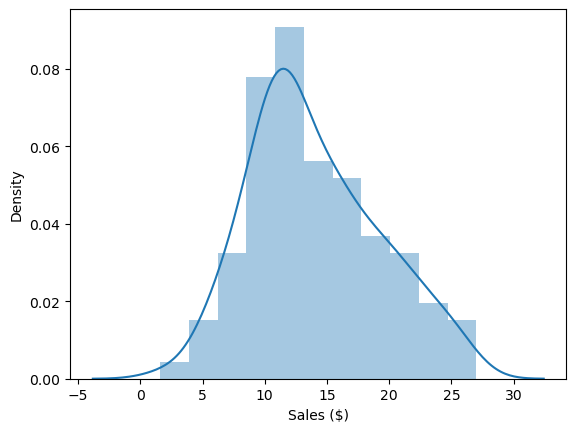

In [16]:
sns.distplot(df['Sales ($)'])

<Axes: xlabel='Sales ($)', ylabel='Count'>

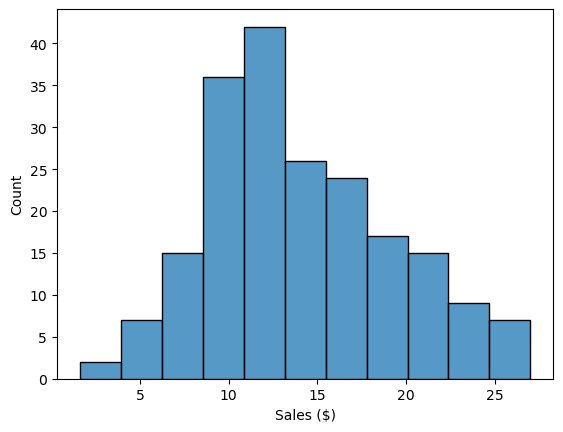

In [17]:
sns.histplot(df['Sales ($)'])

<Axes: ylabel='Sales ($)'>

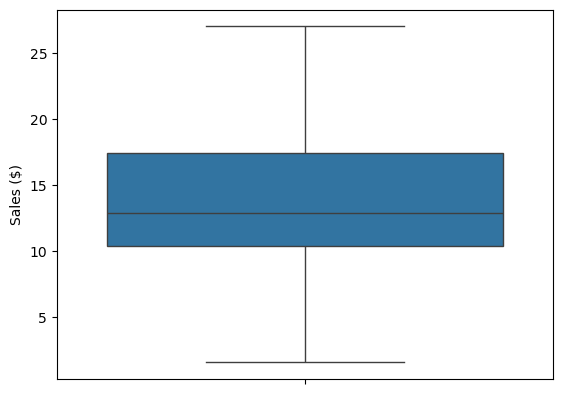

In [18]:
sns.boxplot(df['Sales ($)'])

<Axes: xlabel='Sales ($)', ylabel='Density'>

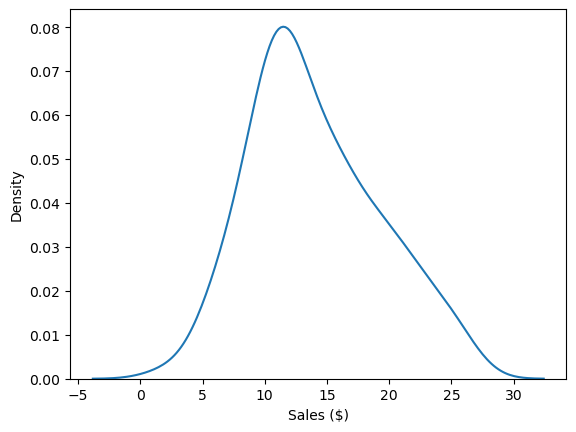

In [19]:
sns.kdeplot(df['Sales ($)'])

In [21]:
df.corr()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV Ad Budget ($),0.017715,1.000000,0.054809,0.056648,0.782224
Radio Ad Budget ($),-0.110680,0.054809,1.000000,0.354104,0.576223
Newspaper Ad Budget ($),-0.154944,0.056648,0.354104,1.000000,0.228299
Sales ($),-0.051616,0.782224,0.576223,0.228299,1.000000


In [22]:
df.drop(columns='Unnamed: 0',inplace=True)

<Axes: >

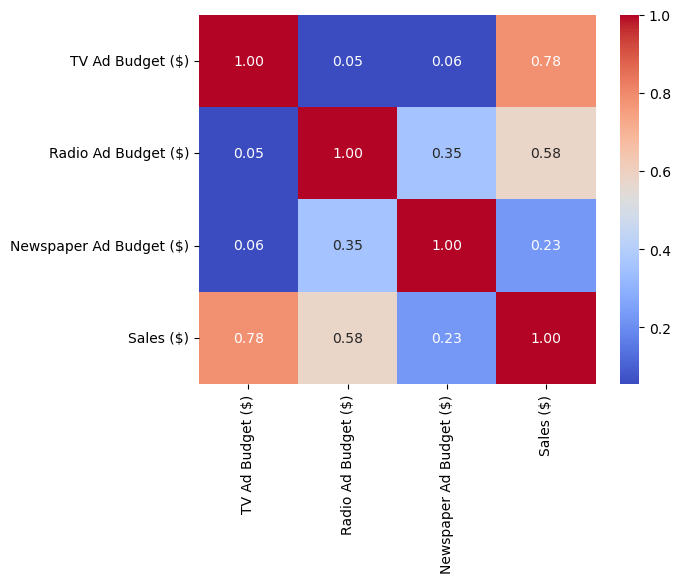

In [28]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')

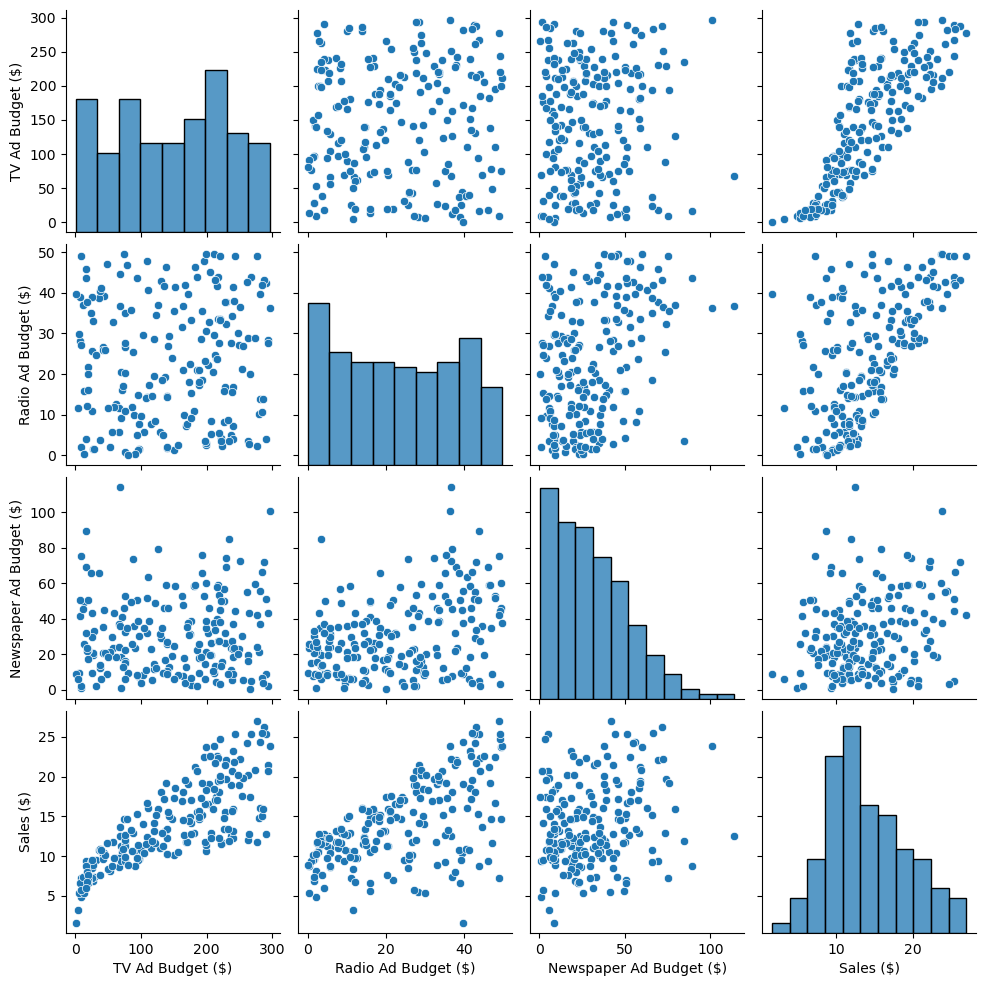

In [32]:
sns.pairplot(df)

In [30]:
df.columns

Index(['TV Ad Budget ($)', 'Radio Ad Budget ($)', 'Newspaper Ad Budget ($)',
       'Sales ($)'],
      dtype='object')

In [33]:
#Applying linear regression to predict the sales

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

In [36]:
X=df.drop(columns='Sales ($)')
y=df['Sales ($)']

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [40]:
m=LinearRegression()

In [41]:
m.fit(X_train,y_train)

LinearRegression()

In [42]:
y_train_pred=m.predict(X_train)

In [43]:
y_test_pred=m.predict(X_test)

In [44]:
mse_train=mean_squared_error(y_train,y_train_pred)
r2_train=r2_score(y_train,y_train_pred)

In [45]:
mse_train

2.3810959820777513

In [46]:
r2_train

0.9101683250935837

In [47]:
mse_test=mean_squared_error(y_test,y_test_pred)
r2_test=r2_score(y_test,y_test_pred)

In [48]:
mse_test

4.22340125290544

In [49]:
r2_test

0.8530916469054767